In [44]:
from selenium import webdriver
#import gspread
#from oauth2client.service_account import ServiceAccountCredentials
from selenium.webdriver import ActionChains
from selenium.webdriver.common.keys import Keys
import time
import os
from collections import defaultdict
from pathlib import Path
import pandas as pd
import surfer
from bs4 import BeautifulSoup as bs
import requests


from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import NoSuchElementException

In [ ]:
http://www.megastudy.net/teacher_v2/bbs/bbs_list.asp?tec_cd=rimbaud666&LeftMenuCd=3&brd_kbn=qnabbs&LeftSubCd=1#bbs_list_ax.asp?tec_cd=rimbaud666&tec_nm=%uC870%uC815%uC2DD&tec_type=1&brd_cd=784&brd_tbl=MS_BRD_TEC784&brd_kbn=qnabbs&dom_cd=5&LeftMenuCd=3&LeftSubCd=1&HomeCd=134&page=1&chr_cd=&sub_nm=&ans_yn=&smode=1&sword=&TmpFlg=0.1750156648987773

In [88]:
teacher_dic = {}
teacher_dic['lmh'] = 'http://www.mimacstudy.com/tcher/studyQna/getStudyQnaList.ds?tcd=531&currPage=10'
teacher_dic['jjs'] = 'http://www.megastudy.net/teacher_v2/bbs/bbs_list.asp?tec_cd=rimbaud666&LeftMenuCd=3&brd_kbn=qnabbs&LeftSubCd=1#/teacher_v2/bbs/bbs_list_ax.asp?tec_cd=rimbaud666&tec_type=1&brd_cd=784&brd_tbl=MS_BRD_TEC784&brd_kbn=qnabbs&ans_yn=&smode=1&sword=&GrpTecCd=&chr_cd=&sub_nm=&my_qna=&page=2'
teacher_dic['jhc'] = 'https://skyedu.conects.com/teachers/teacher_qna/?t_id=jhc01&cat1=1&page=1'
teacher_dic['yhk'] = 'https://www.etoos.com/teacher/board/sub04_math/board_list.asp?teacher_id=200386&selSearchType=&txtSearchWD=&BOARD_ID=2007&QUST_TYPE_CD=&GOOD_QUST_YN=&MOV_YN=&MEM_YN=&NTView=&page=1'
teacher_dic['kww'] = 'https://go3.etoos.com/teacher/board/sub04_math/board_list.asp?TEACHER_ID=200245'

In [46]:
def set_driver():
    global driver, actionChains
    driver = webdriver.Chrome()
    actionChains = ActionChains(driver)
    
def connect_site_with_url(site_url, time):
    driver.get(site_url)
    implicit_wait(time)
    
def username_password_insert(username, password):
    user = driver.find_element_by_id("username")
    pw = driver.find_element_by_id("password")
    user.send_keys(username)
    pw.send_keys(password)

    driver.find_element_by_id("signin_button").click()
    
def implicit_wait(time):
    driver.implicitly_wait(time)

def scroll_very_bottom(very_bottom_element, time):
    driver.execute_script('arguments[0].scrollIntoView(true);', very_bottom_element)
    implicit_wait(time)

# Etoos (YHK)

In [15]:
total_df = pd.DataFrame(columns = ['번호', '분류', '제목', '작성자', '작성일'])
total_df

,번호,분류,제목,작성자,작성일


In [33]:
set_driver()
connect_site_with_url(teacher_dic['yhk'], 3)

In [35]:
driver.find_elements_by_class_name('link_page')[-1].text

'244'

In [20]:
rows = driver.find_elements_by_tag_name('tr')

In [27]:
from collections import defaultdict as dd

In [30]:
a = dd(int)

In [25]:
for row in rows:
    print(row.text.split('\n'))
#     text = row.text.split()
#     index = text[0]
#     category = text[1]
#     title = (' ').join(text[2:-2])
#     writer = text[-2]
#     date = text[-1]
    
#     in_total = {'번호': index,
#                 '분류': category,
#                 '제목': title,
#                 '작성자': writer,
#                 '작성일': date}
    
#     total_df = total_df.append(in_total, ignore_index=True)
#     print(row.text)

['번호 제목 작성자 작성일']
['[공지] 5일 한정 공개! Monthly EBS 이벤트 관련 필독사항! 윤훈관 선생님 2020.02.11']
['(윤훈관 수강생 필독) QnA를 적극적으로 활용해야 하는 이유 윤훈관 선생님 2019.12.23']
['우리가 QnA 게시판에서 대화하는 방법 윤훈관 선생님 2019.12.22']
['4854 [학습방법] 씨알 해석편 김형찬 2020.02.17']
['4853 [먼슬리EBS] Monthly EBS 사전 체험 신청합니다 ! 윤영선 2020.02.17']
['4852 [교재내용] P94 0245질문 김예린 2020.02.17']
['4851 [먼슬리EBS] 먼슬리EBS신청합니다! 이태미 2020.02.17']
['4850 [교재내용] 씨알 [해석편] 134쪽 유채은 2020.02.17']
['4849 [학습방법] 학습커리 장유성 2020.02.17']
['4848 [강좌내용] 해석질문 황수미 2020.02.17']
['4847 [학습방법] 학습순서요! 강다은 2020.02.17']
['4846 [학습방법] 해석한 거 괜찮은 관점에서 한 건지 질문해두 되나용? 현재원 2020.02.17']
['4845 [먼슬리EBS] Monthly EBS 사전체험 신청합니다! 강지원 2020.02.17']
['4844 [먼슬리EBS] 자신감만 있다면 뭐든지 가능합니다! 윤훈관 연구실 2020.02.17']
['4843 [학습방법] 커리타기 류화영 2020.02.17']
['4842 [교재내용] 독해편 질문 차지현 2020.02.17']
['4841 [먼슬리EBS] 먼슬리EBS 사전체험 신청합니다 최인혁 2020.02.17']
['4840 [먼슬리EBS] 앞으로도 좋은 열정 부탁할께요 >_< 윤훈관 연구실 2020.02.17']
['4839 [먼슬리EBS] Monthly EBS사전 체험 신청합니다! 신동은 2020.02.17']
['4838 [먼슬리EBS] 먼슬리로 내신까지 씹어먹어봅시다! 윤훈관 연구실 2020.02.17']
['483

In [18]:
total_df

,번호,분류,제목,작성자,작성일
0,번호,제목,,작성자,작성일
1,[공지],5일,한정 공개! Monthly EBS 이벤트 관련 필독사항! 윤훈관,선생님,2020.02.11
2,(윤훈관,수강생,필독) QnA를 적극적으로 활용해야 하는 이유 윤훈관,선생님,2019.12.23
3,우리가,QnA,게시판에서 대화하는 방법 윤훈관,선생님,2019.12.22
4,4847,[학습방법],학습커리,장유성,2020.02.17
5,4846,[강좌내용],해석질문,황수미,2020.02.17
6,4845,[학습방법],학습순서요!,강다은,2020.02.17
7,4844,[학습방법],해석한 거 괜찮은 관점에서 한 건지 질문해두 되나용?,현재원,2020.02.17
8,4843,[먼슬리EBS],Monthly EBS 사전체험 신청합니다!,강지원,2020.02.17
9,4842,[먼슬리EBS],자신감만 있다면 뭐든지 가능합니다! 윤훈관,연구실,2020.02.17


In [24]:
html = requests.get(teacher_dic['yhk'])

In [26]:
soup = bs(html.content, from_encoding='cp949')

In [27]:
table = soup.find('table')

In [29]:
rows = table.find_all('tr')

In [30]:
rows

[<tr>
 <th>번호</th> <th>제목</th> <th>작성자</th> <th>작성일</th>
 </tr>,
 <tr class="notice" style="background:#f6fcfc;">
 <td><img alt="공지" src="https://img.etoos.com/sub2016/common/ico_notice.png"/></td>
 <td class="tit">
 <span class="ellip" style="white-space:normal;">
 <a class="link" href="./board_read.asp?MYQ=&amp;GOOD=&amp;selQType=&amp;selSubject=&amp;selLecture=&amp;TEACHER_ID=200386&amp;page=&amp;selSearchType=&amp;txtSearchWD=&amp;BOARD_ID=2007&amp;BOARD_ARTI_ID=26645180">
 <b>[공지] 5일 한정 공개! Monthly EBS 이벤트 관련 필독사항!</b> <img alt="New" src="https://img.etoos.com/sub2016/common/ico_new.png"/>
 </a>
 </span>
 </td>
 <td>
 								윤훈관 선생님
 							</td>
 <td>2020.02.11</td>
 </tr>,
 <tr class="notice" style="background:#f6fcfc;">
 <td><img alt="공지" src="https://img.etoos.com/sub2016/common/ico_notice.png"/></td>
 <td class="tit">
 <span class="ellip" style="white-space:normal;">
 <a class="link" href="./board_read.asp?MYQ=&amp;GOOD=&amp;selQType=&amp;selSubject=&amp;selLecture=&amp;TEAC

In [34]:
header = rows[0].find_all('th')

In [50]:
total_df = pd.DataFrame(columns = ['번호', '분류', '제목', '작성자', '작성일'])
total_df

,번호,분류,제목,작성자,작성일


In [51]:
for row in rows[4:]:
    text = row.text.split()
    index = text[0]
    category = text[1]
    title = (' ').join(text[2:-2])
    writer = text[-2]
    date = text[-1]
    
    in_total = {'번호': index,
                '분류': category,
                '제목': title,
                '작성자': writer,
                '작성일': date}
    
    total_df = total_df.append(in_total, ignore_index=True)
    
    

In [52]:
total_df

,번호,분류,제목,작성자,작성일
0,4814,[먼슬리EBS],Monthly EBS 사전체험 신청합니다!,강지원,2020.02.17
1,4813,[학습방법],커리타기,류화영,2020.02.17
2,4812,[교재내용],독해편 질문,차지현,2020.02.17
3,4811,[먼슬리EBS],먼슬리EBS 사전체험 신청합니다,최인혁,2020.02.17
4,4810,[먼슬리EBS],Monthly EBS사전 체험 신청합니다!,신동은,2020.02.17
5,4809,[공부법],수능특강 영어 공부법,이승민,2020.02.17
6,4808,[고민상담],공부방법 질문,장현주,2020.02.17
7,4807,[먼슬리EBS],monthly EBS 사전 체험 신청합니다!,김현지,2020.02.17
8,4806,[먼슬리EBS],Monthly EBS 사전 체험 신청합니다!,강주희,2020.02.17
9,4805,[먼슬리EBS],먼슬리 EBS 사전체험 신청합니다,장유성,2020.02.17


# DS MyMac

In [89]:
set_driver()
connect_site_with_url(teacher_dic['lmh'], 3)

In [90]:
rows = driver.find_elements_by_tag_name('tr')

In [91]:
for row in rows:
    print(row.text.split())

['번호', '유형', '제목', '조회수', '등록일', '글쓴이']
['★', '공지', '[자주', '묻는', '질문', '3]', '커리큘럼', '65921', '2018/11/16', '운영자']
['★', '공지', '[자주', '묻는', '질문', '2]', '학습법', '51757', '2018/11/16', '운영자']
['★', '공지', '[자주', '묻는', '질문', '1]', '일반', '34490', '2018/11/16', '운영자']
['639864', '강좌', '[답변][재질문]', '161번', '0', '2020/02/18', '연구실']
['639863', '강좌', '일리', '질문이요', '1', '2020/02/18', '강특위']
['639862', '강좌', '[답변]질문이요', '3', '2020/02/18', '연구실']
['639861', '강좌', '일리', '해석에', '관해', '1', '2020/02/18', '홍민기']
['639860', '강좌', '[답변]해석에', '관해', '9', '2020/02/18', '연구실']
['639859', '학습법', '복습', '1', '2020/02/18', '남현수']
['639858', '학습법', '[답변]복습', '3', '2020/02/18', '연구실']
['639857', '교재', '일리', '16번', '0', '2020/02/18', '이용호']
['639856', '교재', '[답변]16번', '0', '2020/02/18', '연구실']
['639855', '강좌', '일리', '자동사', '타동사', '추가', '질문...', '1', '2020/02/18', '정우진']
['639854', '강좌', '[답변]자동사', '타동사', '추가', '질문...', '2', '2020/02/18', '연구실']
['639853', '강좌', 'Syntax', '1.0', '[평가원', '구문독해]', '[재질문]', '150번', '1',

# MegaStudy (JJS)

In [47]:
set_driver()
connect_site_with_url(teacher_dic['jjs'], 3)

In [55]:
rows = driver.find_elements_by_tag_name('tr')

In [57]:
for row in rows:
    print(row.text.split())

['번호', '분류', '제목', '이름', '등록일', '상태']
['공지', '★', '워크북', '활용', '매뉴얼']
['공지', '*', '[2019-03-14]', '자주', '올라오는', '질문']
['공지', '질문시', '꼭', '지켜주세요.(지켜지지', '않으면', '답변', '없습니다.', 'by', '조정식)']
['125727', '강좌', '문화상품은', '구체적,', ',', '윤희재', '2020-02-18', '답변대기']
['125726', '강좌', '52번', '해석', '질문이요', '엄애경', '2020-02-18', '답변대기']
['125725', '강좌', '23p', '홍다윗', '2020-02-18', '답변대기']
['125724', '교재', '473번', '신지현', '2020-02-18', '답변대기']
['125723', '교재', '116', '서동진', '2020-02-18', '답변대기']
['125722', '강좌', 'might', '이의영', '2020-02-18', '답변대기']
['125721', '강좌', '명사구', '양현주', '2020-02-18', '답변대기']
['125720', '강좌', '질문여', '박호현', '2020-02-18', '답변대기']
['125719', '기타', '현강', '대기', '김도은', '2020-02-18', '답변완료']
['125718', '강좌', 'as', '해석', '강나원', '2020-02-18', '답변대기']
[]
[]
[]
[]
[]
[]


# SkyEdu (JHC)

In [71]:
set_driver()
connect_site_with_url(teacher_dic['jhc'], 3)

In [59]:
rows = driver.find_elements_by_tag_name('tr')

In [61]:
for row in rows:
    text = row.text.split()
    print(text)

['NO', '분류', '제목', '답변', '작성자', '등록일']
['115260', '학습', 'to', '부정사', '답변대기', '전*서', '2020-02-18']
['115259', '학습', '막장', '공부흔적', '72쪽', '44번', '답변대기', '최*진', '2020-02-18']
['115258', '교재질문', '답변대기', '권*윤', '2020-02-18']
['115257', '학습', '막장', '동사시제', '답변대기', '최*진', '2020-02-18']
['115256', '기타', '커리', '질문입니다', '답변완료', '나*성', '2020-02-18']
['115255', '학습', '막장구원공부흔적', 'p.112,', '21번', '답변완료', '김*경', '2020-02-18']
['115254', '강좌', '막장구원', '4일차', '공부흔적질문이요', '답변완료', '이*현', '2020-02-18']
['115253', '스피드리딩', '공부흔적', '구문', 'day4', '46페이지', '80번', '문장', '답변완료', '이*재', '2020-02-18']
['115252', '스피드리딩', '공부흔적', '구문', 'day4', '44페이지', '72번', '문장', '답변완료', '이*재', '2020-02-18']
['115251', '스피드리딩', '공부흔적', '구문', 'day4', '43페이지', '67번', '문장', '답변완료', '이*재', '2020-02-18']


In [24]:
set_driver()

In [19]:
connect_site_with_url(teacher_dic['jhc'], 1)

In [21]:
driver.find_element_by_tag_name('table').text

'NO 분류 제목 답변 작성자 등록일\n115189 학습 스피드 리딩 공부흔적 질문있어요!! 답변완료 서*영 2020-02-17\n115188 막장 공부흔적 17쪽 36번 답변완료 이*은 2020-02-17\n115187 강좌 막장 189p 선행사&관계대명사의 종류와 격의 변화 답변완료 최*주 2020-02-17\n115186 안햇다 못햇다 답변완료 안*빈 2020-02-17\n115185 막장구원 14쪽 답변완료 박*리 2020-02-17\n115184 강좌 스피드 어법 답변완료 임*규 2020-02-17\n115183 전명구 구분 답변완료 임*상 2020-02-17\n115182 강좌 2021 스피드어법 답변완료 천*준 2020-02-16\n115181 how해석 답변완료 최*빈 2020-02-16\n115180 학습 중학20day 답변완료 엘* 2020-02-16'

In [84]:
def time_series_qna(excel):
    name = excel.split('.')[0]
    excel = pd.read_excel(excel)
    excel.date = pd.to_datetime(excel.date)
    excel = excel.sort_values(by='date')
    excel = excel.reset_index(drop = True)
    excel.set_index('date', inplace = True)
    
    plt.style.use('fivethirtyeight')
    qna_day = excel['qna_count'].plot(title=name)


    fig = qna_day.get_figure()
    fig.set_size_inches(13.5, 9)

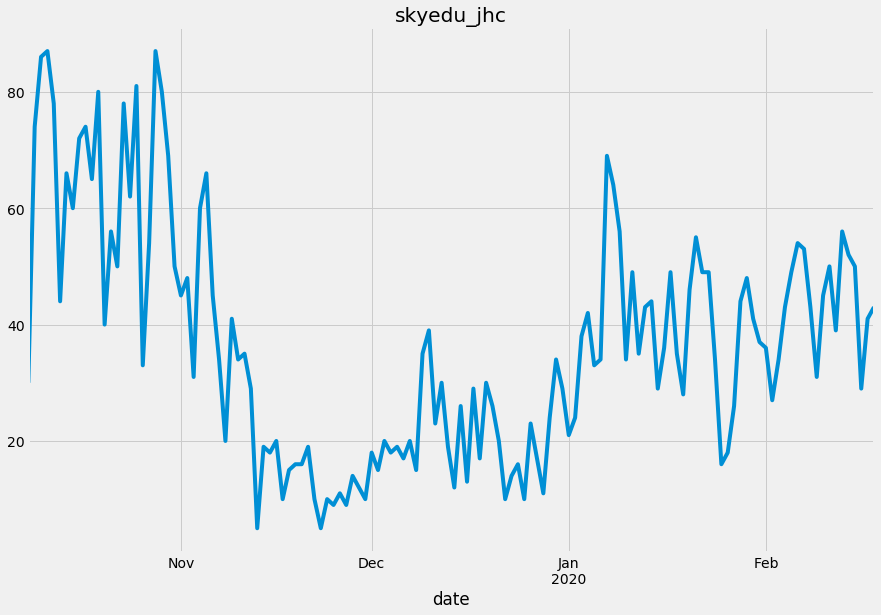

In [85]:
time_series_qna('skyedu_jhc.xlsx')

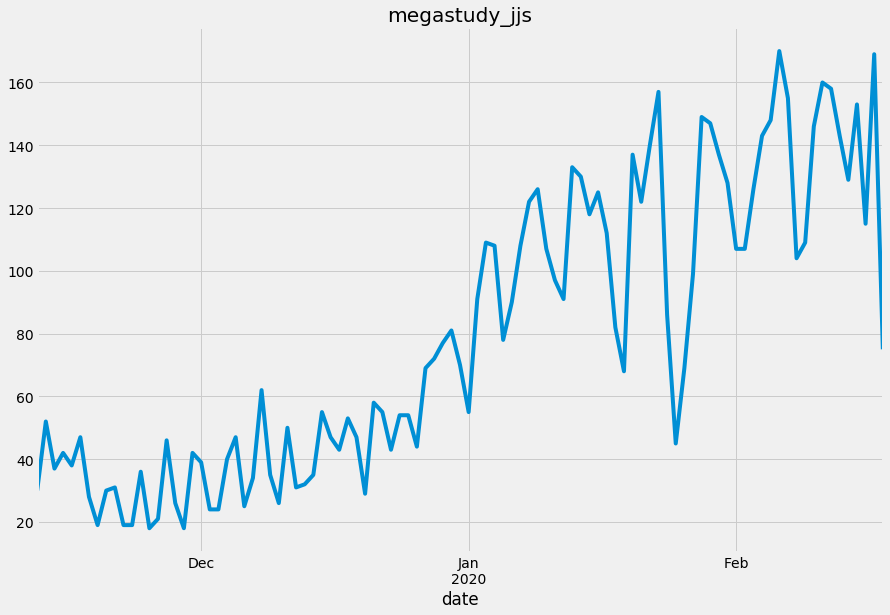

In [86]:
time_series_qna('megastudy_jjs.xlsx')

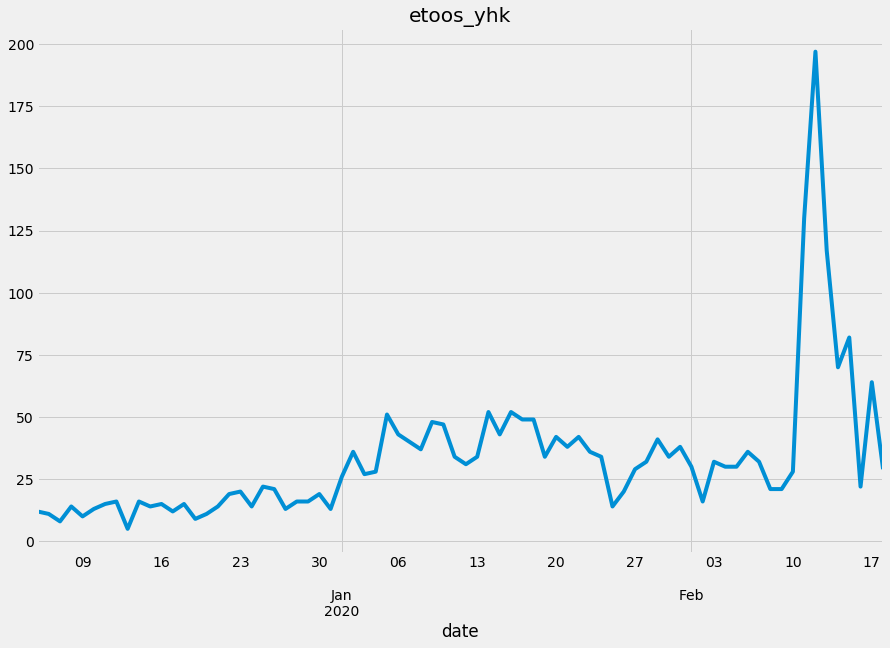

In [87]:
time_series_qna('etoos_yhk.xlsx')

In [3]:
import matplotlib.pylab as plt
import pandas as pd

In [62]:
mega = pd.read_excel("megastudy_jjs.xlsx")

In [64]:
mega.date = pd.to_datetime(mega.date)

In [65]:
mega = mega.sort_values(by='date')
mega = mega.reset_index(drop = True)
mega.set_index('date', inplace = True)

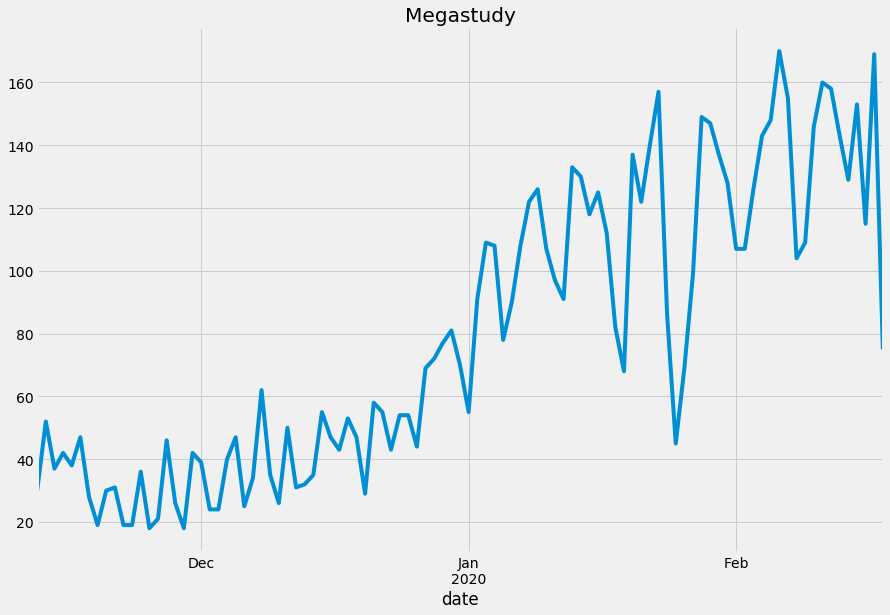

In [68]:
plt.style.use('fivethirtyeight')
qna_day = mega['qna_count'].plot(title='Megastudy')


fig = qna_day.get_figure()
fig.set_size_inches(13.5, 9)

In [15]:
panda = pd.read_excel("result.xlsx", sep = ',',encoding='CP949')

In [18]:
panda.date = pd.to_datetime(panda.date)

In [19]:
panda.head(10)

,date,qna_count
0,2020-02-18,29
1,2020-02-17,64
2,2020-02-16,22
3,2020-02-15,82
4,2020-02-14,70
5,2020-02-13,117
6,2020-02-12,197
7,2020-02-11,130
8,2020-02-10,28
9,2020-02-09,21


In [33]:
panda = panda.sort_values(by='date')

In [37]:
panda = panda.reset_index(drop = True)

In [39]:
panda.set_index('date', inplace = True)

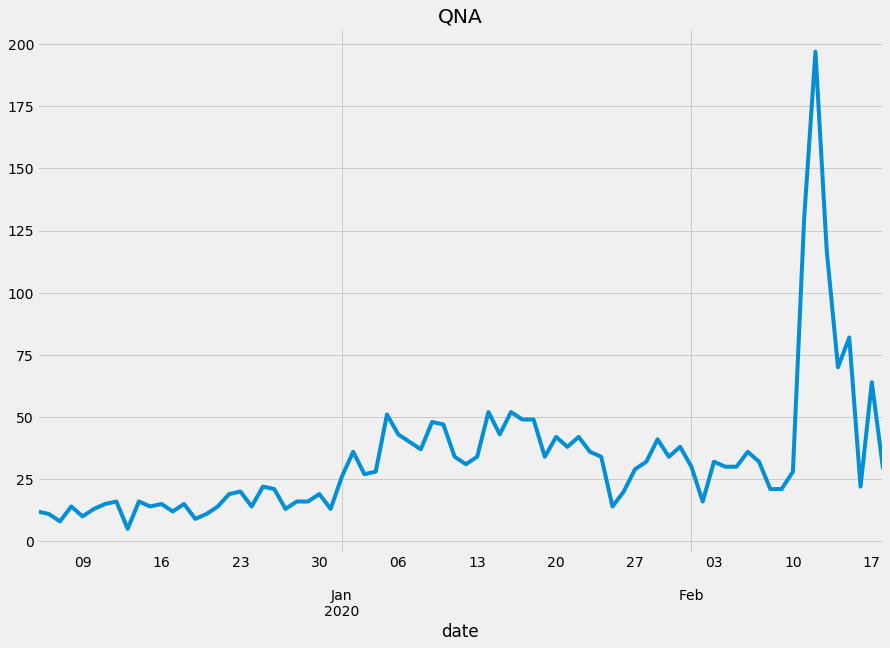

In [42]:
plt.style.use('fivethirtyeight')
qna_day = panda['qna_count'].plot(title='QNA')


fig = qna_day.get_figure()
fig.set_size_inches(13.5, 9)